### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import pickle

### Loading Dataset

In [2]:
# # Loading the dataset and perform splitting
# data_list = []
# labels_list = []
# classes_list = 43

# imgs_path = "../input/gtsrb-german-traffic-sign/Train"
# for i in range(classes_list):
#     i_path = os.path.join(imgs_path, str(i)) #0-42
#     for img in os.listdir(i_path):
#         im = Image.open(i_path +'/'+ img)
#         im = im.resize((32,32))
#         im = np.array(im)
#         data_list.append(im)
#         labels_list.append(i)
# data = np.array(data_list)
# labels = np.array(labels_list)

In [2]:
# Opening file for reading in binary mode
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)

gray_train_imgs = gray_data['x_train']
gray_test_imgs = gray_data['x_test']
gray_train_labels = gray_data['y_train']
gray_test_labels = gray_data['y_test']
gray_valid_imgs = gray_data['x_validation']
gray_valid_labels = gray_data['y_validation']

In [3]:
gray_train_labels[gray_train_labels <= 10] = 0 #cycle
gray_train_labels[gray_train_labels >= 32] = 0 #cycle
gray_train_labels[(gray_train_labels == 15) |(gray_train_labels == 16)| (gray_train_labels ==17)] = 0 #cycle
gray_train_labels[(gray_train_labels >= 18) & (gray_train_labels <= 31)] = 1 #triangle
gray_train_labels[(gray_train_labels == 13) | (gray_train_labels == 11)] = 1 #triangle
gray_train_labels[gray_train_labels == 14] = 2 # 6
gray_train_labels[gray_train_labels == 12] = 3 # 4


gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 1 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 1 #triangle
gray_test_labels[gray_test_labels == 14] = 2 # 6
gray_test_labels[gray_test_labels == 12] = 3 # 4

gray_valid_labels[gray_valid_labels <= 10] = 2 #cycle
gray_valid_labels[gray_valid_labels >= 32] = 2 #cycle
gray_valid_labels[(gray_valid_labels == 15) |(gray_valid_labels == 16)| (gray_valid_labels ==17)] = 2 #cycle
gray_valid_labels[(gray_valid_labels >= 18) & (gray_valid_labels <= 31)] = 0 #triangle
gray_valid_labels[(gray_valid_labels == 13) | (gray_valid_labels == 11)] = 0 #triangle
gray_valid_labels[gray_valid_labels == 14] = 3 # 6
gray_valid_labels[gray_valid_labels == 12] = 1 # 4

In [4]:
gray_train_imgs.shape

(86989, 32, 32, 1)

### Image Data Preprocessing

In [4]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = gray_train_imgs
x_test = gray_test_imgs
x_valid = gray_valid_imgs
# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 4

# One Hot Encoding
y_train = keras.utils.to_categorical(gray_train_labels, num_class_shape)
y_test = keras.utils.to_categorical(gray_test_labels, num_class_shape)
y_valid = keras.utils.to_categorical(gray_valid_labels, num_class_shape)

In [5]:
a, x_train, b, y_train = train_test_split(gray_train_imgs, y_train, test_size=0.36, random_state=42)

### LeNet Model Architecture

In [6]:
from keras.backend import clear_session
clear_session()

In [2]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(4, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [6]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1 )#, validation_data = (x_valid , y_valid))

Epoch 1/20


KeyboardInterrupt: 

In [10]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 2s 4ms/step - loss: 0.0350 - accuracy: 0.9946
Test Loss: 0.03496749326586723
Test accuracy: 0.9946159720420837


In [11]:
from sklearn.metrics import classification_report
import numpy as np
pred = model.predict(x_test).argmax(axis = 1)
classification_report(y_test.argmax(axis = 1) , pred ,  output_dict=True)

395/395 [==============================] - 1s 3ms/step


{'0': {'precision': 0.9951070336391438,
  'recall': 0.9969362745098039,
  'f1-score': 0.9960208142026323,
  'support': 8160},
 '1': {'precision': 0.9937428896473265,
  'recall': 0.9954415954415955,
  'f1-score': 0.9945915172217479,
  'support': 3510},
 '2': {'precision': 0.9922779922779923,
  'recall': 0.9518518518518518,
  'f1-score': 0.9716446124763706,
  'support': 270},
 '3': {'precision': 0.9941176470588236,
  'recall': 0.9797101449275363,
  'f1-score': 0.9868613138686132,
  'support': 690},
 'accuracy': 0.9946159936658749,
 'macro avg': {'precision': 0.9938113906558215,
  'recall': 0.9809849666826969,
  'f1-score': 0.987279564442341,
  'support': 12630},
 'weighted avg': {'precision': 0.9946133944214708,
  'recall': 0.9946159936658749,
  'f1-score': 0.9946020919461424,
  'support': 12630}}

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

In [13]:
model_save_dir = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\shape_classifier_model_36per_train_data.h5"  

model.save(model_save_dir)

## Hope you like it!

In [ ]:
from matplotlib import pyplot as plt
image = gray_test_imgs[5]#.transpose(2 , 0 ,1)
# plt.imshow(image, cmap=plt.get_cmap('gray'))
# plt.show()
y = model.predict(image)
print(y)

In [9]:
from keras.models import load_model
model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\shape_classifier_model (2).h5')

In [12]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test).argmax(axis = 1)

cm = confusion_matrix(pred , y_test.argmax(axis = 1))

395/395 [==============================] - 3s 9ms/step


Text(0.5, 1.0, 'Correlation between Variables in happiness21')

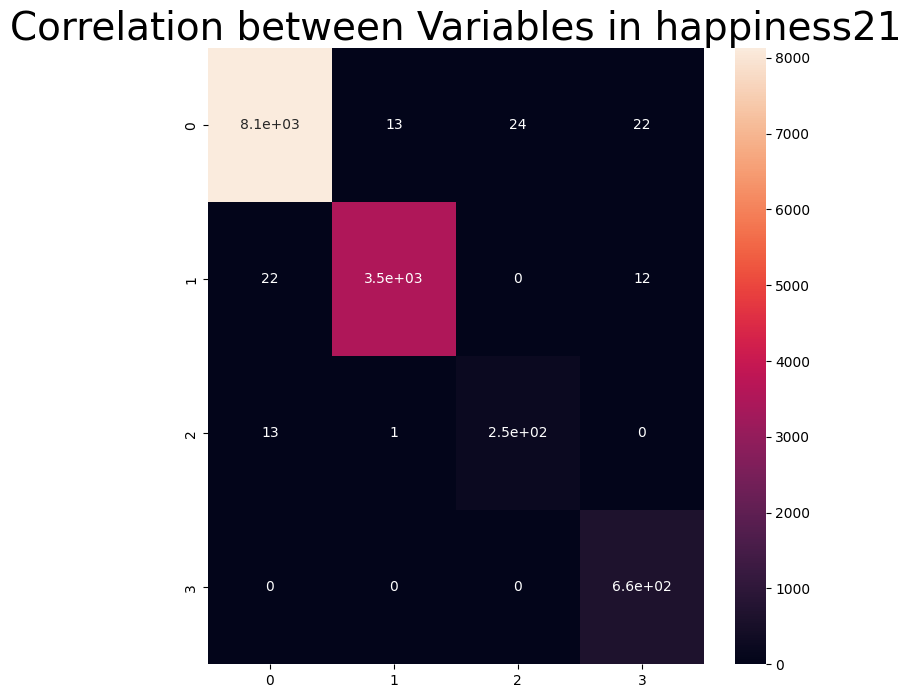

In [21]:
from seaborn import heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
heatmap(cm,annot=True, fmt='.2g')
